# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [62]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key


In [63]:
# Load the CSV file created in Part 1 into a Pandas DataFrame 
city_data_df = pd.read_csv("..\output_data\cities.csv") 

# Display sample data 
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tiksi,71.6872,128.8694,269.32,81,100,2.06,RU,1715487759
1,1,lazaro cardenas,17.9583,-102.2000,296.55,81,61,1.05,MX,1715487765
2,2,hasaki,35.7333,140.8333,297.20,71,100,11.54,JP,1715487765
3,3,naze,28.3667,129.4833,298.66,76,70,4.76,JP,1715487766
4,4,ilanskiy,56.2358,96.0650,284.91,53,100,6.11,RU,1715487767


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [64]:
import hvplot.pandas

# Define colors
colors = ['#FFA500', '#8B4513', '#0000FF', '#008000']  # Orange, Brown, Blue, Green

# Create a scatter plot using hvplot with predefined colors
scatter_plot = city_data_df.hvplot.scatter(
    x='Lng',
    y='Lat',
    size='Humidity',
    hover_cols=['City'],
    title='City Humidity',
    xlabel='Longitude',
    ylabel='Latitude',
    frame_width=700,
    frame_height=500,
    color=colors,  # Predefined colors
    cmap=None,  # Disable colormap
    colorbar=False,  # Disable colorbar
    tiles='CartoLight',
)

# Show the plot
scatter_plot

:Overlay
   .Tiles.I   :Tiles   [x,y]
   .Scatter.I :Scatter   [Lng]   (Lat,Humidity,City)

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [78]:
# Narrow down cities that fit criteria and drop any results with null values
filtered_cities_df = city_data_df[(city_data_df['Max Temp'] > 70) & (city_data_df['Max Temp'] < 80) & 
                                  (city_data_df['Wind Speed'] < 10) & (city_data_df['Cloudiness'] == 0)]

# Drop any rows with null values
filtered_cities_df = filtered_cities_df.dropna()

# Display sample data
filtered_cities_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Step 3: Create a new DataFrame called `hotel_df`.

In [66]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = city_data_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,tiksi,RU,71.6872,128.8694,81,
1,lazaro cardenas,MX,17.9583,-102.2000,81,
2,hasaki,JP,35.7333,140.8333,71,
3,naze,JP,28.3667,129.4833,76,
4,ilanskiy,RU,56.2358,96.0650,53,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [69]:
import requests
import pandas as pd
hotel_df = city_data_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()
hotel_df['Hotel Name'] = ""
radius = 10000
print("Starting hotel search")
for index, row in hotel_df.iterrows():
    latitude = row['Lat']
    longitude = row['Lng']
    base_url = "https://api.geoapify.com/v2/places"
    params = {
        'categories': 'accommodation.hotel',
        'filter': f'circle:{longitude},{latitude},{radius}',
        'bias': f'proximity:{longitude},{latitude}',
        'limit': 1,
        'apiKey': geoapify_key
    }
    try:
        response = requests.get(base_url, params)
        response.raise_for_status()
        name_address = response.json()
        if 'features' in name_address and name_address['features']:
            hotel_name = name_address['features'][0]['properties'].get('name', 'No hotel name available')
        else:
            hotel_name = "No hotel found"
        hotel_df.loc[index, 'Hotel Name'] = hotel_name
        print(f"{row['City']} - nearest hotel: {hotel_name}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve data for {row['City']}: {e}")
        hotel_df.loc[index, 'Hotel Name'] = "API Request Failed"
print("Hotel search completed")
print(hotel_df.head())

Starting hotel search
tiksi - nearest hotel: Арктика
lazaro cardenas - nearest hotel: Hotel Sol del Pacífico
hasaki - nearest hotel: Choshi Plaza Hotel
naze - nearest hotel: ビジネス旅館畠山
ilanskiy - nearest hotel: Берёзка
port mathurin - nearest hotel: Escale Vacances
yellowknife - nearest hotel: No hotel name available
kyaikkami - nearest hotel: ရှုခင်းသာ
antsiranana - nearest hotel: Central
korsakov - nearest hotel: гостиница "Альфа"
dudinka - nearest hotel: Виктория
puerto ayora - nearest hotel: Hostal La Mirada De Solitario George
constantia - nearest hotel: Hotel Chérica
papatowai - nearest hotel: No hotel found
waitangi - nearest hotel: Hotel Chathams
lannemezan - nearest hotel: Grand Hôtel et café de la gare
hermanus - nearest hotel: Aloe guest house
port-aux-francais - nearest hotel: Keravel
olovyannaya - nearest hotel: No hotel found
invercargill - nearest hotel: The Grand
road town - nearest hotel: No hotel name available
anadyr - nearest hotel: Гостевой дом
rongelap - nearest hot

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
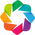

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Hotel Name,Country)

In [15]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

# To display the plot (only if automatic display does not work)
hv.output(map_plot)


# Sample data to illustrate the structure
data = {
    'Lat': [37.7749, 34.0522, 40.7128],
    'Lon': [-122.4194, -118.2437, -74.0060],
    'Hotel Name': ['Hotel A', 'Hotel B', 'Hotel C'],
    'Country': ['USA', 'USA', 'USA']
}
hotel_df = pd.DataFrame(data)

# Ensure the column names are correct
if 'Lon' not in hotel_df.columns or 'Lat' not in hotel_df.columns:
    print("Error: 'Lon' and 'Lat' columns not found in the DataFrame.")
else:
    # Configure the map plot with hover information
    map_plot = hotel_df.hvplot.points(
        x='Lon',
        y='Lat',
        geo=True,
        tiles='EsriImagery',
        frame_width=800,
        frame_height=600,
        size=10,  # Adjust the size as needed
        hover_cols=['Hotel Name', 'Country']  # Add columns to display in the hover tooltip
    )

    # Show the map plot
    map_plot
